# Aerolinea - DB5A
Master en Big Data Science - Universidad de Navarra <br>
Gestion de Proyectos y Vision de Negocio <br>
Marzo 2025 <br>
Leyre de la Cazalda, Pablo Benavides, Dick Rogeir Lizana, Carmen Casado y Diego de Lemos

## Importamos las librerias necesarias para realizar el trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Leemos la base de datos

In [ ]:
df = pd.read_csv('/content/aerolinea_2.csv', sep=";")

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flights per year,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,2.0,460,3.0,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,3.0,235,3.0,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,3.0,1142,2.0,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,3.0,562,2.0,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,7.0,214,3.0,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#uploaded = files.upload()  # This will prompt you to upload the file
#df = pd.read_csv(io.BytesIO(uploaded['aerolinea_2.csv']), sep=";")
#df.head()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flights per year                   129840 non-null  float64
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129845 non-null  float64
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

*   Gender: Gender of the passengers (Female, Male)
*   Customer Type: The customer type (Loyal customer, disloyal customer)
*   Age: The actual age of the passengers
* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* Flight per year: Number of flight per year
* Flight distance: The flight distance of this journey
* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
* Ease of Online booking: Satisfaction level of online booking
* Gate location: Satisfaction level of Gate location
* Food and drink: Satisfaction level of Food and drink
* Online boarding: Satisfaction level of online boarding
* Seat comfort: Satisfaction level of Seat comfort
* Inflight entertainment: Satisfaction level of inflight entertainment
* On-board service: Satisfaction level of On-board service
* Leg room service: Satisfaction level of Leg room service
* Baggage handling: Satisfaction level of baggage handling
* Check-in service: Satisfaction level of Check-in service
* Inflight service: Satisfaction level of inflight service
* Cleanliness: Satisfaction level of Cleanliness
* Departure Delay in Minutes: Minutes delayed when departure
* Arrival Delay in Minutes: Minutes delayed when Arrival
* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Transformacion y Limpieza

## Imputation of Missing and Duplicated values

In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flights per year,40
Flight Distance,0
Inflight wifi service,35
Departure/Arrival time convenient,0


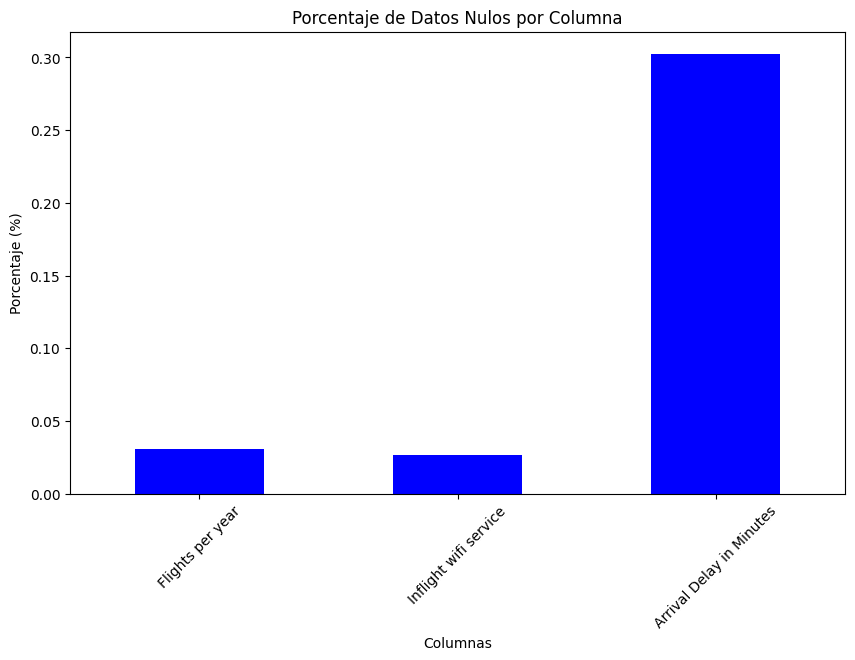

In [ ]:
plt.figure(figsize=(10, 6))
(df.isnull().sum() / len(df) * 100).loc[lambda x: x > 0].plot(kind='bar', color='blue')
plt.title('Porcentaje de Datos Nulos por Columna')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

Se utiliza mean para las variables de satisfaccion que contienen una distrucion normal <br>

Para la variable de Arrival Delay in Minutes se utilizo la mediana debido a que existen outliers que pueden afectar a la media

In [ ]:
df['Flights per year'].fillna(df['Flights per year'].mean(), inplace=True)
df['Inflight wifi service'].fillna(df['Inflight wifi service'].mean(), inplace=True)
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

<ipython-input-76-f078d601daea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flights per year'].fillna(df['Flights per year'].mean(), inplace=True)
<ipython-input-76-f078d601daea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

## Assign datatype

In [ ]:
df['Flights per year'] = df['Flights per year'].astype(int)
df['Inflight wifi service'] = df['Inflight wifi service'].astype(int)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

# Exploratory Data Analysis

### Gender

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Female,65899
Male,63981


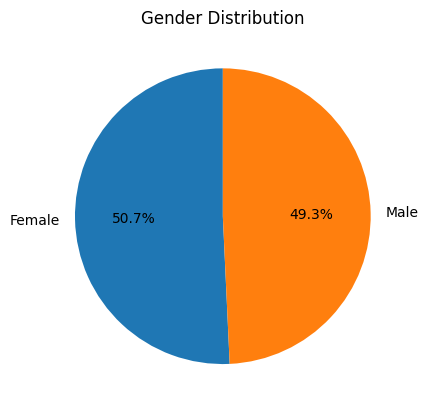

In [ ]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


### Customer Type

In [ ]:
df["Customer Type"].value_counts()

,count
Customer Type,
Loyal Customer,106100
disloyal Customer,23780


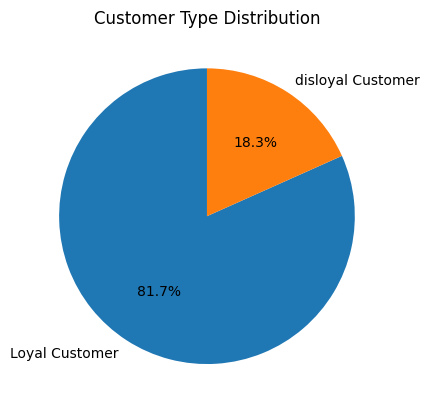

In [ ]:
df['Customer Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()


### Age

In [ ]:
df['Age'].value_counts()


,count
Age,
39,3692
25,3511
40,3209
44,3104
41,3089
...,...
74,61
76,60
79,52


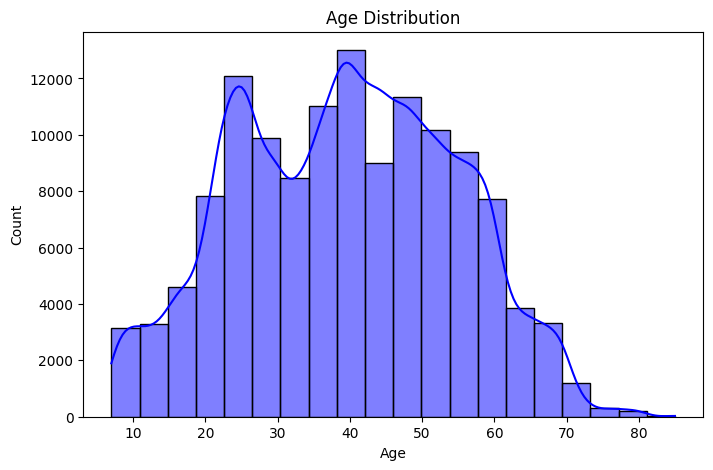

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Type of Travel

In [ ]:
df['Type of Travel'].value_counts()


,count
Type of Travel,
Business travel,89693
Personal Travel,40187


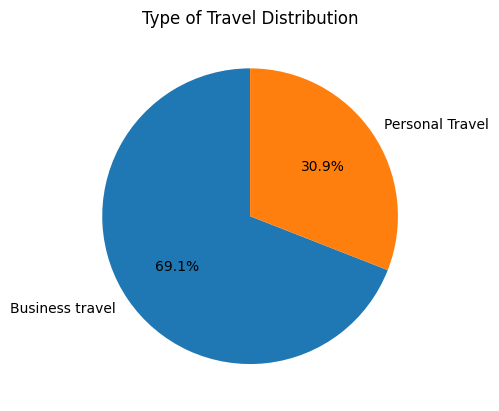

In [ ]:
df['Type of Travel'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Type of Travel Distribution')
plt.ylabel('')
plt.show()


### Class

In [ ]:
df['Class'].value_counts()

,count
Class,
Business,62160
Eco,58309
Eco Plus,9411


<ipython-input-87-ab62730f3086>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette='viridis')


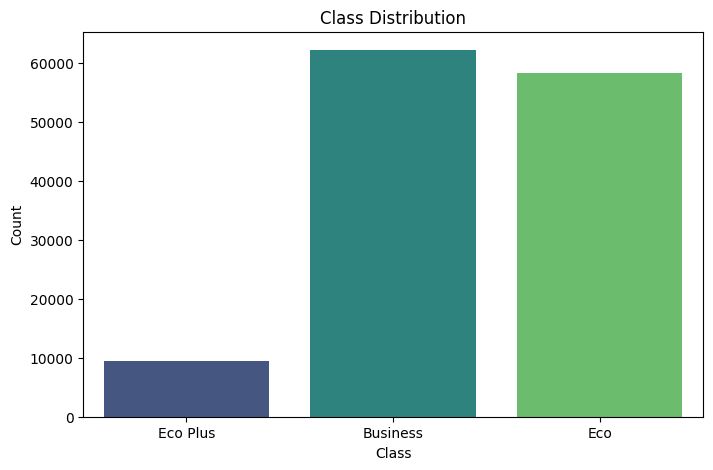

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Class'], palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Flights per Year

In [ ]:
df['Flights per year'].value_counts()

,count
Flights per year,
5,28970
3,26820
4,26432
6,23548
2,10893
7,9090
1,3163
8,939
9,25


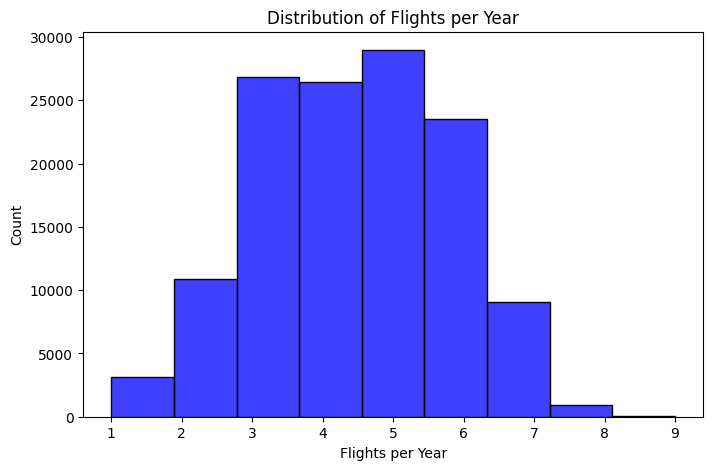

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Flights per year'], bins=9, kde=False, color='blue')
plt.title('Distribution of Flights per Year')
plt.xlabel('Flights per Year')
plt.ylabel('Count')
plt.show()

### Flight Distance

In [ ]:
df['Flight Distance'].value_counts()

,count
Flight Distance,
337,841
594,505
404,480
862,473
2475,470
...,...
1051,1
324,1
1003,1


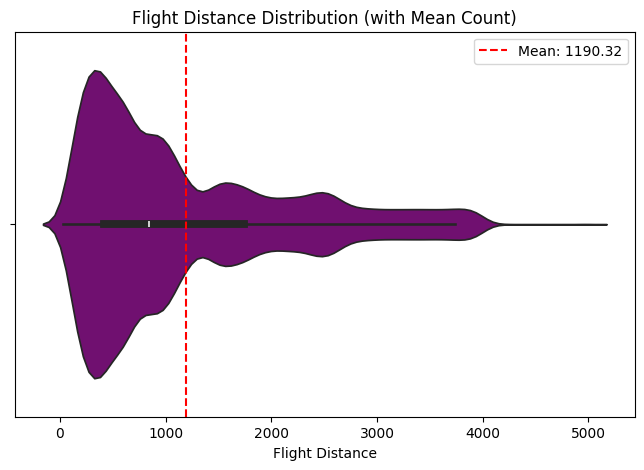

In [ ]:
plt.figure(figsize=(8, 5))

sns.violinplot(x=df['Flight Distance'], color='purple')

mean_value = df['Flight Distance'].mean()

plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

plt.title('Flight Distance Distribution (with Mean Count)')
plt.xlabel('Flight Distance')
plt.legend()
plt.show()


### Satisfaction variables <br>


*   Inflight wifi service
*   Departure/Arrival time convenient
*   Ease of Online booking
*   Gate Location
*   Food and drink
*   Online boarding
*   Seat comfort
*   Inflight entertainment
*   On-board service
*   Leg room service
*   Baggage handling
*   Check-in service
*   Inflight service
*   Cleanliness



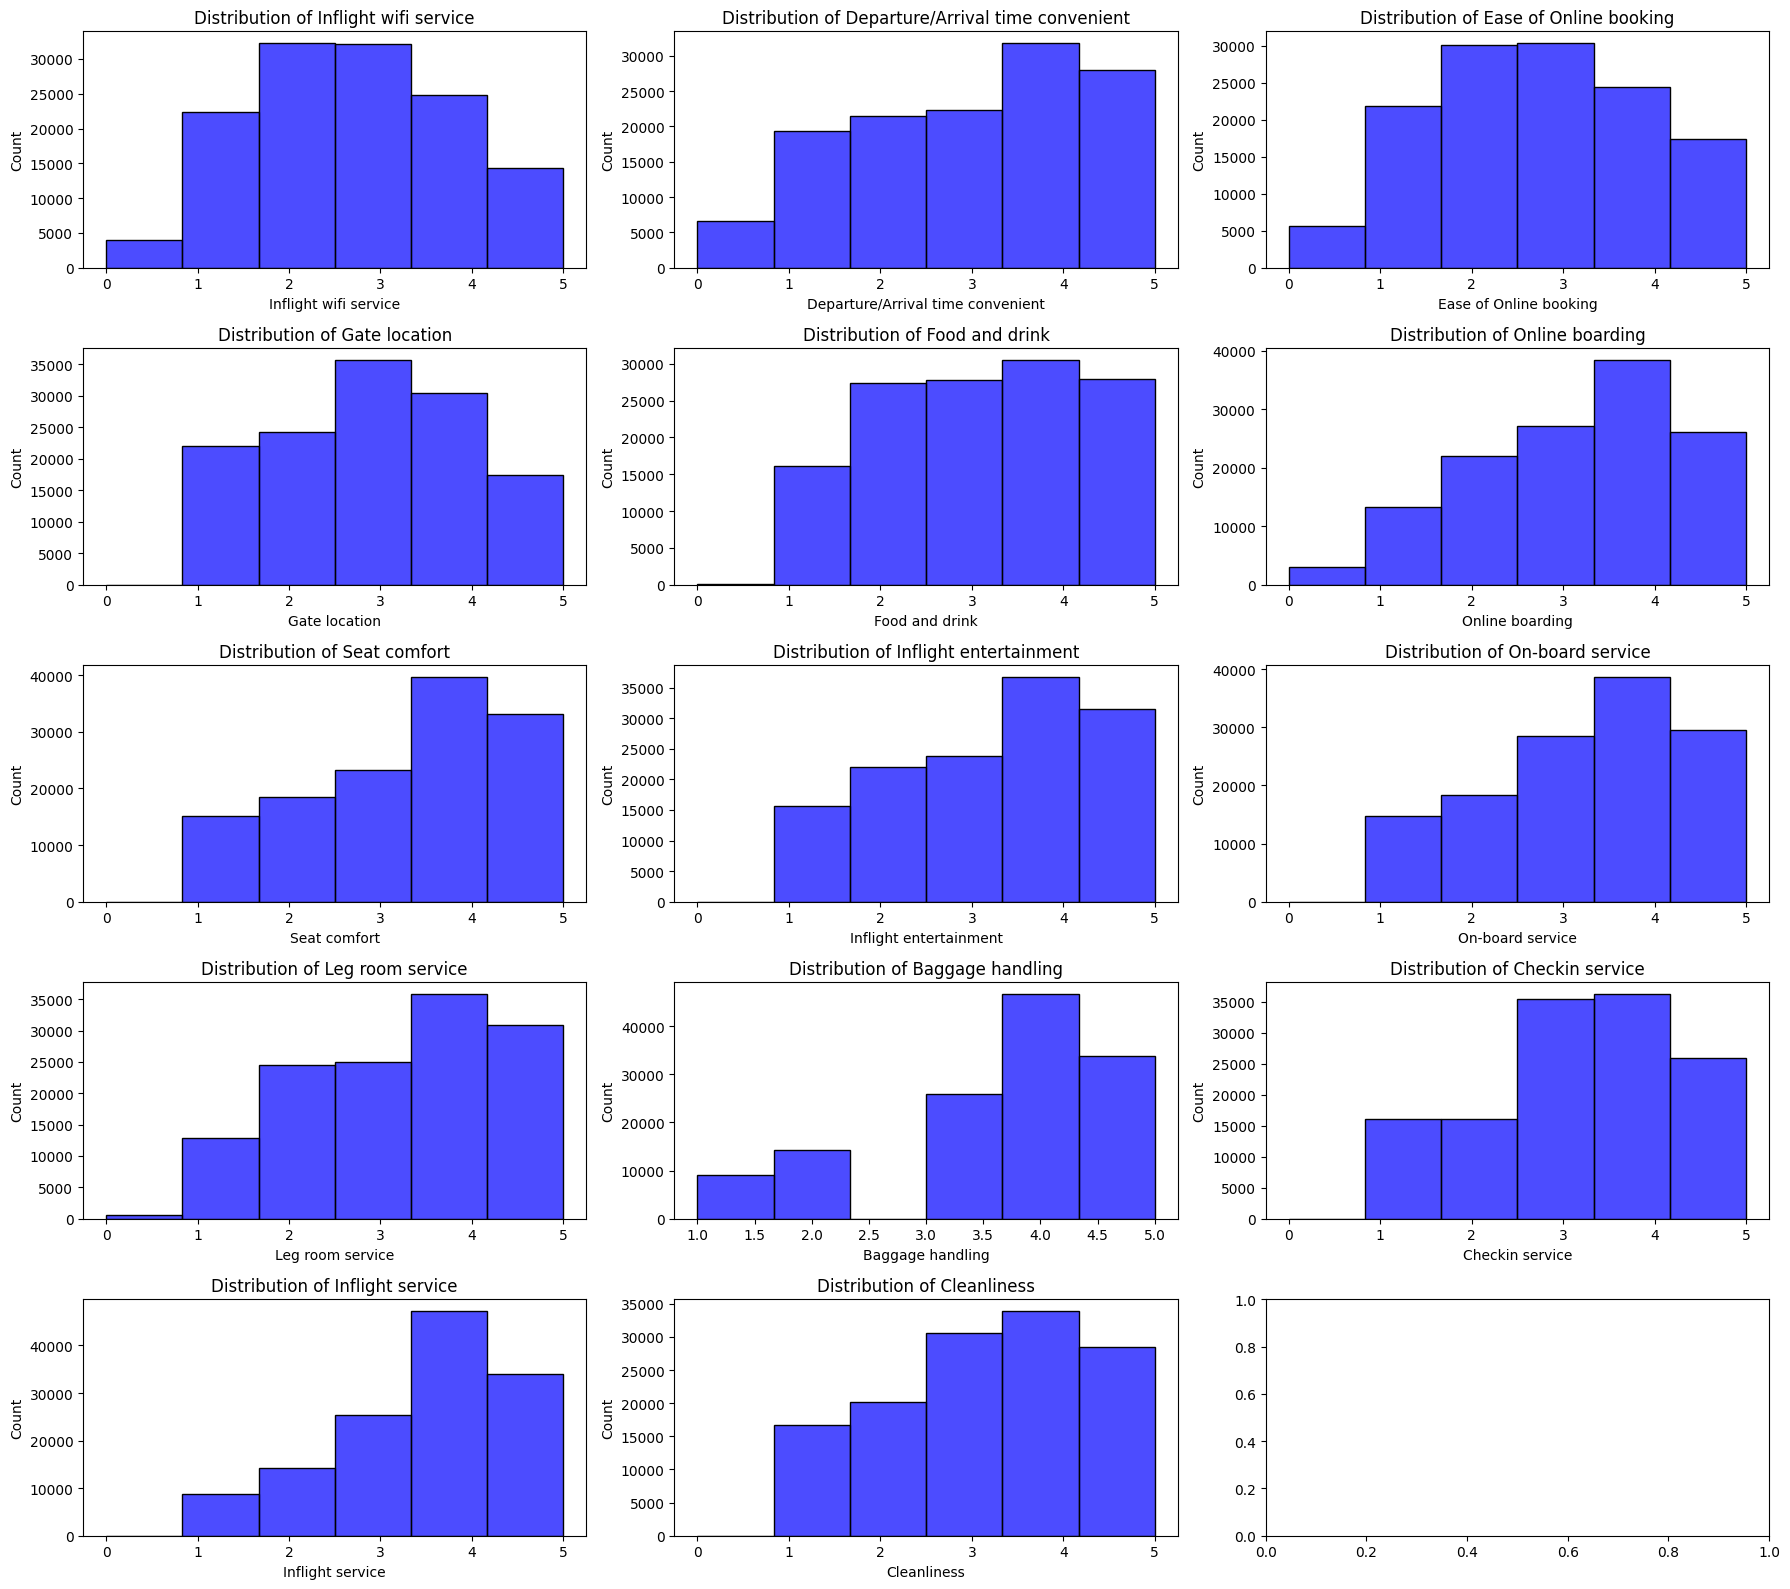

In [ ]:
variables = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

fig, axes = plt.subplots(5, 3, figsize=(18, 16))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df[var], kde=False, bins=6, ax=axes[i], color='blue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


### Departure Delay in Minutes

In [ ]:
df['Departure Delay in Minutes'].value_counts()

,count
Departure Delay in Minutes,
0,73356
1,3682
2,2855
3,2535
4,2309
...,...
624,1
569,1
756,1


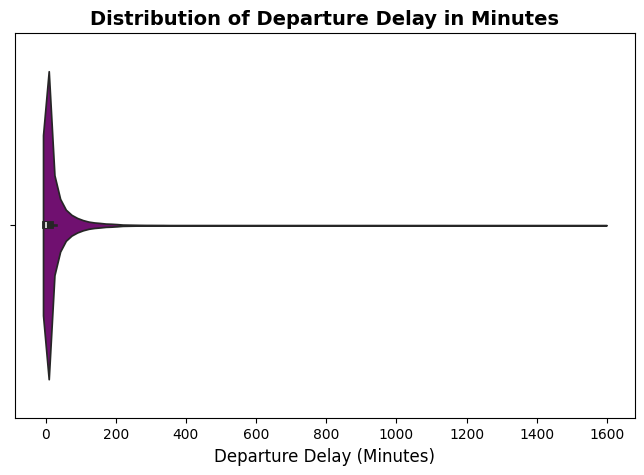

In [ ]:
plt.figure(figsize=(8, 5))

sns.violinplot(x=df['Departure Delay in Minutes'], color='purple')

plt.title('Distribution of Departure Delay in Minutes', fontsize=14, fontweight='bold')
plt.xlabel('Departure Delay (Minutes)', fontsize=12)

plt.show()

In [ ]:
df['Departure Delay in Minutes'].max()


np.int64(1592)

### Arrival Delay in Minutes

In [ ]:
df['Departure Delay in Minutes'].value_counts()

,count
Departure Delay in Minutes,
0,73356
1,3682
2,2855
3,2535
4,2309
...,...
624,1
569,1
756,1


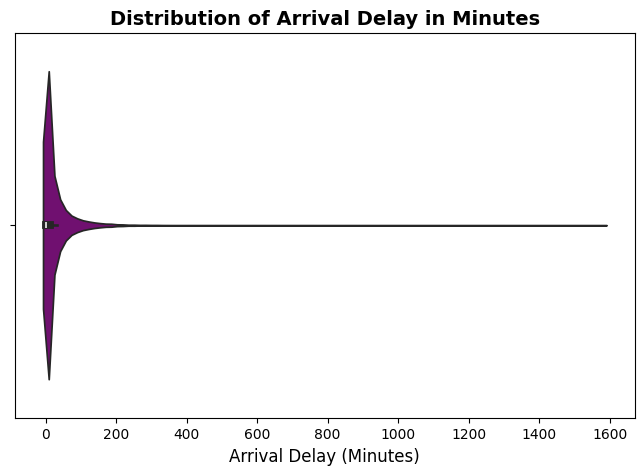

In [ ]:
plt.figure(figsize=(8, 5))

sns.violinplot(x=df['Arrival Delay in Minutes'], color='purple')

plt.title('Distribution of Arrival Delay in Minutes', fontsize=14, fontweight='bold')
plt.xlabel('Arrival Delay (Minutes)', fontsize=12)

plt.show()

In [ ]:
df['Arrival Delay in Minutes'].max()

np.int64(1584)

### Satisfaction

In [ ]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,73452
satisfied,56428


<ipython-input-100-993a546c7289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['satisfaction'], palette='viridis')


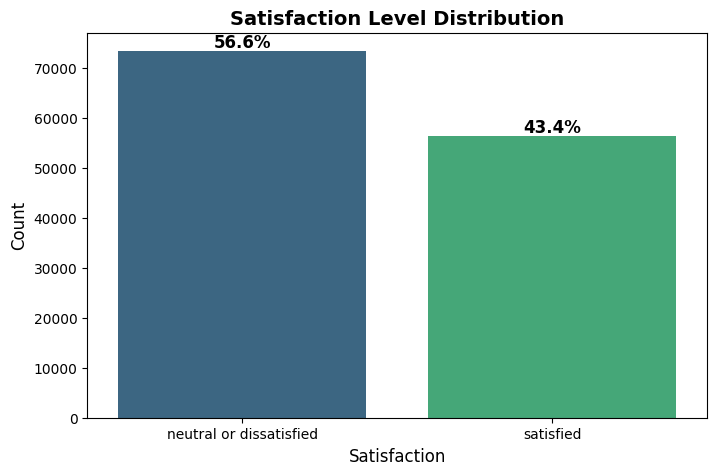

In [ ]:
plt.figure(figsize=(8, 5))

satisfaction_counts = df['satisfaction'].value_counts()
total = len(df)

ax = sns.countplot(x=df['satisfaction'], palette='viridis')

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title('Satisfaction Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


# Codificacion de variables categoricas <br>


*   Gender
*   Customer Type
*   Type of travel
*   Class
*   satisfaction


### Gender <br>
Para esta variable se le asigno el valor de 1 si el valor es Male y el valor de 0 si el valor es Female. Para un mejor entendimiento se renombra esta variable a Gender_male

In [ ]:
df['Gender Male'] = df['Gender'].map({'Male': 1, 'Female': 0})

df.drop(columns=['Gender'], inplace=True)


### Customer Type <br>
Para los valores iguales a Loyal Customer le asignamos el valor 1 y para los valores de disloyal Customer se le asigno el valor 0. La variable fue renombrada tambien para su mejor entendimiento.

In [ ]:
df['is_loyal'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})

df.drop(columns=['Customer Type'], inplace=True)

### Type of Travel <br>
Se le asigno el valor de 1 a los vuelos por motivos de trabajo y 0 a los vuelos por motivos personales. Tambien se renombro la variable para su mejor entendimiento

In [ ]:
df['Business Travel'] = df['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})

df.drop(columns=['Type of Travel'], inplace=True)

### Class <br>
Como la variable tiene valores con un orden establecido (Eco - Eco Plus - Business Class), se realizo un label-encoding para asignarle valores numericos

In [ ]:
df['Class'] = df['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})

### Satisfaction <br>
En este caso se asigno el valor de 1 si el cliente estaba satisfecho y 0 si no es el caso.

In [ ]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   id                                 129880 non-null  int64
 1   Age                                129880 non-null  int64
 2   Class                              129880 non-null  int64
 3   Flights per year                   129880 non-null  int64
 4   Flight Distance                    129880 non-null  int64
 5   Inflight wifi service              129880 non-null  int64
 6   Departure/Arrival time convenient  129880 non-null  int64
 7   Ease of Online booking             129880 non-null  int64
 8   Gate location                      129880 non-null  int64
 9   Food and drink                     129880 non-null  int64
 10  Online boarding                    129880 non-null  int64
 11  Seat comfort                       129880 non-null  int64
 12  In

# Correlation

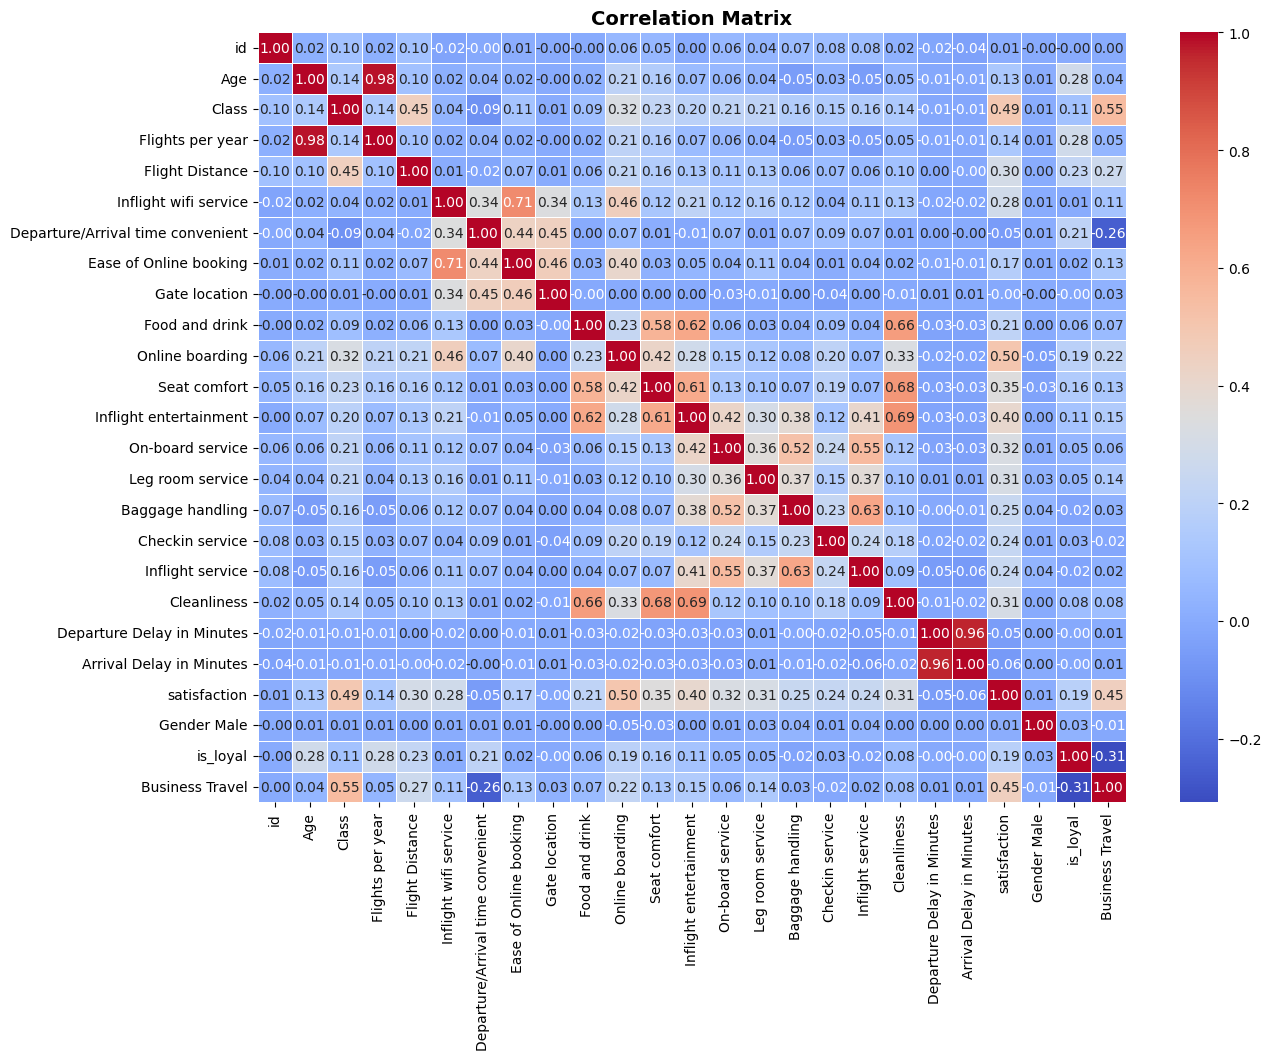

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix", fontsize=14, fontweight='bold')

plt.show()

# Most Representative Variables Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer  # Import SimpleImputer

In [ ]:
X = df.drop('satisfaction', axis=1)  # Features
y = df['satisfaction']  # Target variable

### Lasso <br>

In [ ]:
# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your feature data and transform it
X_imputed = imputer.fit_transform(X)

# Now, you can fit the Lasso model on the imputed data
lasso = Lasso(alpha=0.01)
lasso.fit(X_imputed, y)

model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_imputed)  # Use imputed data here as well

selected_features_lasso = X.columns[model.get_support()]
print("Selected Features (Lasso):", selected_features_lasso)

Selected Features (Lasso): Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'is_loyal',
       'Business Travel'],
      dtype='object')


### Random Forest <br>

In [ ]:
rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features_rf = feature_importances.sort_values(ascending=False).head(10).index

print("Important Features (Random Forest):", important_features_rf)

Important Features (Random Forest): Index(['Online boarding', 'Inflight wifi service', 'Class', 'Business Travel',
       'Inflight entertainment', 'Seat comfort', 'Leg room service',
       'is_loyal', 'Flight Distance', 'Ease of Online booking'],
      dtype='object')


### Comparison <br>

In [ ]:
common_features = list(set(selected_features_lasso) & set(important_features_rf))

print("Features selected by Lasso:", selected_features_lasso)
print("Important features from Random Forest:", important_features_rf)
print("Common features:", common_features)

Features selected by Lasso: Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'is_loyal',
       'Business Travel'],
      dtype='object')
Important features from Random Forest: Index(['Online boarding', 'Inflight wifi service', 'Class', 'Business Travel',
       'Inflight entertainment', 'Seat comfort', 'Leg room service',
       'is_loyal', 'Flight Distance', 'Ease of Online booking'],
      dtype='object')
Common features: ['Inflight wifi service', 'Class', 'Inflight entertainment', 'Business Travel', 'Leg room service', 'Ease of Online booking', 'is_loyal', 'Online boarding', 'Seat comfort', 'Flight Distance']


# Feature Selection y Reducción de la Dimensionalidad

### RFE <br>

In [ ]:
estimator = LogisticRegression()

selector = RFE(estimator, n_features_to_select=5, step=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = selector.fit(X_scaled[:, [X.columns.get_loc(c) for c in common_features]], y)

selected_features_rfe = [common_features[i] for i in range(len(common_features)) if selector.support_[i]]

print("Características seleccionadas por RFE:", selected_features_rfe)

Características seleccionadas por RFE: ['Inflight entertainment', 'Business Travel', 'Leg room service', 'is_loyal', 'Online boarding']


### PCA <br>

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled[:, [X.columns.get_loc(c) for c in common_features]])

print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.28628092 0.1650259 ]


# Clustering

In [ ]:
X_cluster = df[selected_features_rfe]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

### Elbow <br>

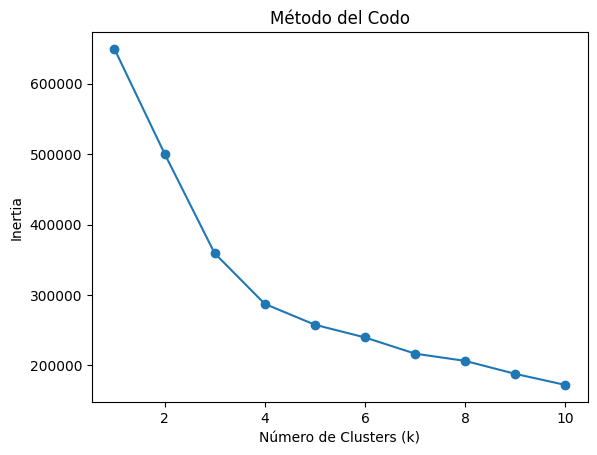

In [ ]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Silohuette <br>

In [ ]:
#silhouette_scores = []
#for n_clusters in range(3, 5):  # Silhouette requiere al menos 2 clusters
   # kmeans = KMeans(n_clusters=n_clusters, random_state=42)
   # cluster_labels = kmeans.fit_predict(X_cluster_scaled)
   # silhouette_scores.append(silhouette_score(X_cluster_scaled, cluster_labels))

#plt.plot(range(2, 5), silhouette_scores, marker='o')
#plt.title('Silhouette Score')
#plt.xlabel('Número de Clusters (k)')
#plt.ylabel('Silhouette Score')
#plt.show()

In [ ]:
optimal_n_clusters =  4

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

In [ ]:
# Calcula el número de clientes por cluster
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

cluster
0    41833
3    39553
2    24714
1    23780
Name: count, dtype: int64


In [ ]:
cluster_means = df.groupby('cluster')[selected_features_rfe].mean()
print(cluster_means)

         Inflight entertainment  Business Travel  Leg room service  is_loyal  \
cluster                                                                        
0                      4.377716         0.989649          4.233237       1.0   
1                      3.059378         0.991548          3.220648       0.0   
2                      2.436271         1.000000          2.449098       1.0   
3                      3.035219         0.000000          3.059414       1.0   

         Online boarding  
cluster                   
0               4.235293  
1               2.713162  
2               2.867970  
3               2.778019  


### Etiquetado de clusters <br>

In [ ]:
cluster_means = df.groupby('cluster')[selected_features_rfe].mean()
print(cluster_means)

         Inflight entertainment  Business Travel  Leg room service  is_loyal  \
cluster                                                                        
0                      4.377716         0.989649          4.233237       1.0   
1                      3.059378         0.991548          3.220648       0.0   
2                      2.436271         1.000000          2.449098       1.0   
3                      3.035219         0.000000          3.059414       1.0   

         Online boarding  
cluster                   
0               4.235293  
1               2.713162  
2               2.867970  
3               2.778019  


In [ ]:
for cluster in df['cluster'].unique():
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['Business Travel'].value_counts(normalize=True))

Cluster 3:
Business Travel
0    1.0
Name: proportion, dtype: float64
Cluster 1:
Business Travel
1    0.991548
0    0.008452
Name: proportion, dtype: float64
Cluster 0:
Business Travel
1    0.989649
0    0.010351
Name: proportion, dtype: float64
Cluster 2:
Business Travel
1    1.0
Name: proportion, dtype: float64


### Visualización de Clústers <br>

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

In [ ]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

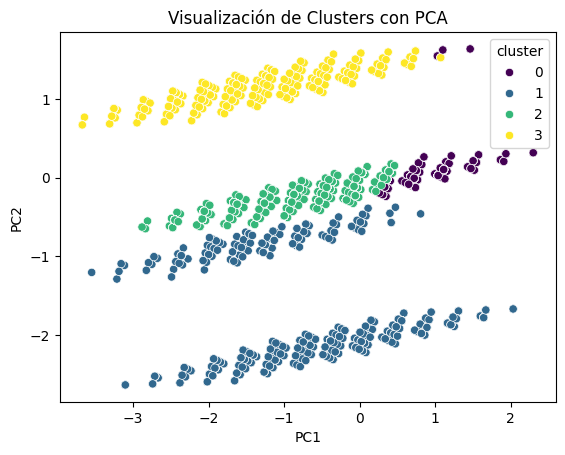

In [ ]:
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Visualización de Clusters con PCA')
plt.show()

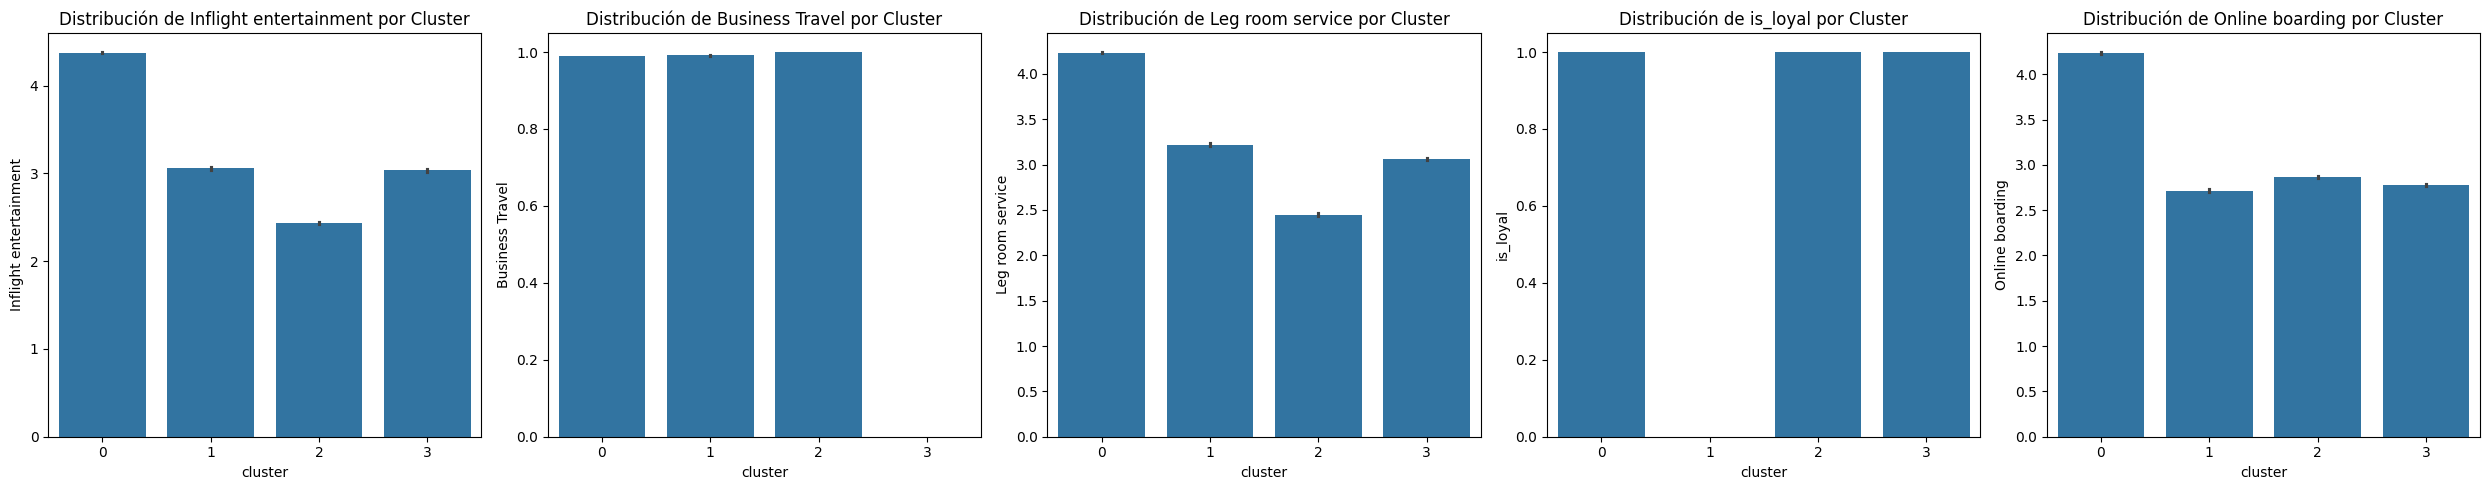

In [ ]:
variables = selected_features_rfe

num_variables = len(variables)
fig, axes = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5))

for i, var in enumerate(variables):
    sns.barplot(x='cluster', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {var} por Cluster')

plt.tight_layout()
plt.show()

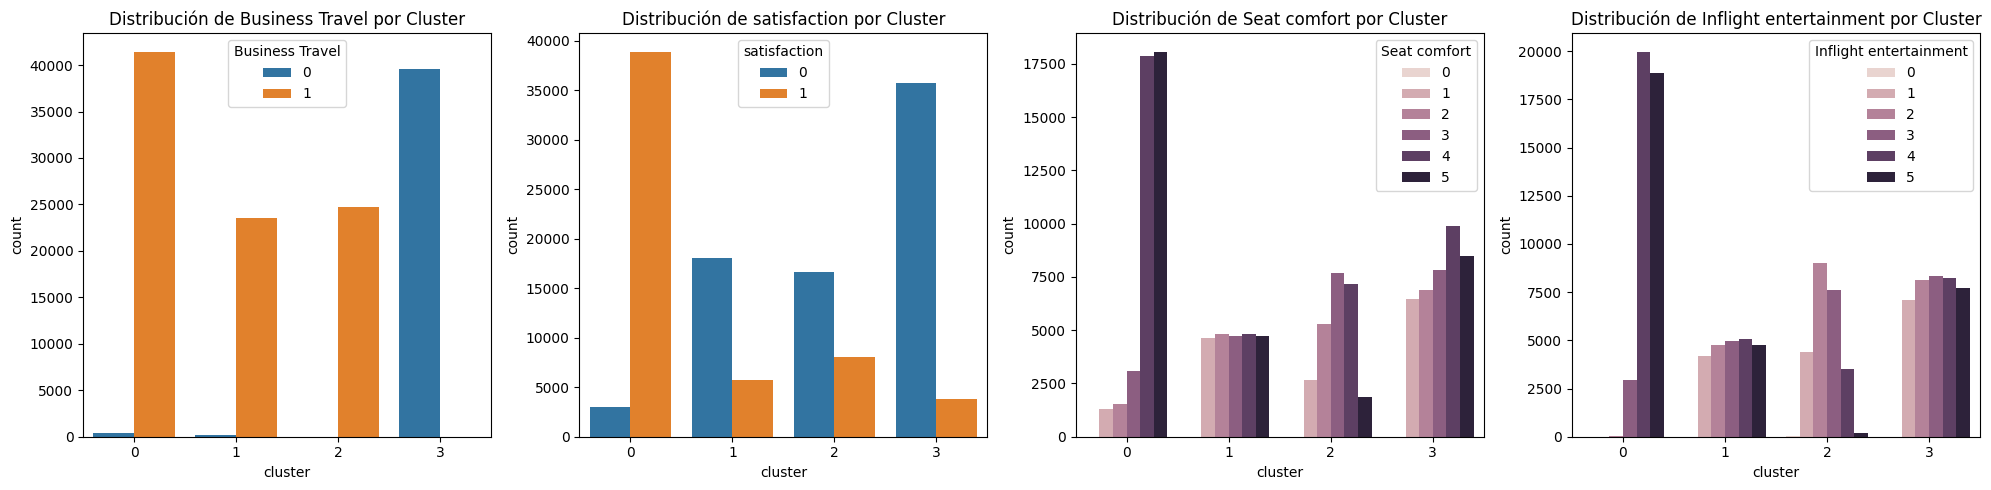

In [ ]:
features_to_analyze = ['Business Travel', 'satisfaction', 'Seat comfort', 'Inflight entertainment']

num_features = len(features_to_analyze)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, feature in enumerate(features_to_analyze):
    sns.countplot(x='cluster', hue=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature} por Cluster')

plt.tight_layout()
plt.show()

In [ ]:
print(cluster_means)

for cluster in df['cluster'].unique():
    print(f"\nCluster {cluster}:")
    print("Características con valores más altos:")
    print(cluster_means.loc[cluster].sort_values(ascending=False).head(3))
    print("Características con valores más bajos:")
    print(cluster_means.loc[cluster].sort_values(ascending=True).head(3))

         Inflight entertainment  Business Travel  Leg room service  is_loyal  \
cluster                                                                        
0                      4.377716         0.989649          4.233237       1.0   
1                      3.059378         0.991548          3.220648       0.0   
2                      2.436271         1.000000          2.449098       1.0   
3                      3.035219         0.000000          3.059414       1.0   

         Online boarding  
cluster                   
0               4.235293  
1               2.713162  
2               2.867970  
3               2.778019  

Cluster 3:
Características con valores más altos:
Leg room service          3.059414
Inflight entertainment    3.035219
Online boarding           2.778019
Name: 3, dtype: float64
Características con valores más bajos:
Business Travel    0.000000
is_loyal           1.000000
Online boarding    2.778019
Name: 3, dtype: float64

Cluster 1:
Características co


Tabla de contingencia para Business Travel:
 Business Travel      0      1
cluster                      
0                  433  41400
1                  201  23579
2                    0  24714
3                39553      0


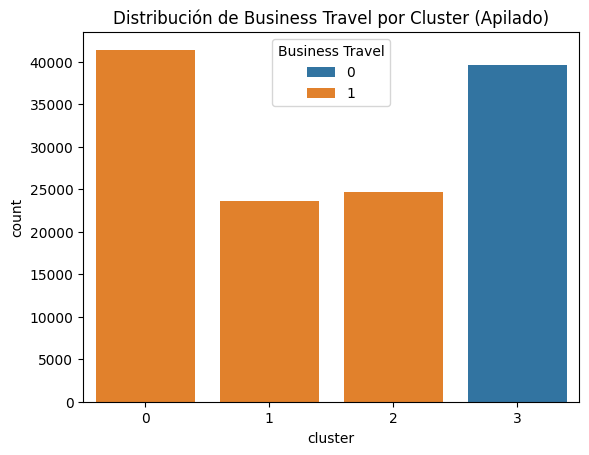


Tabla de contingencia para is_loyal:
 is_loyal      0      1
cluster               
0             0  41833
1         23780      0
2             0  24714
3             0  39553


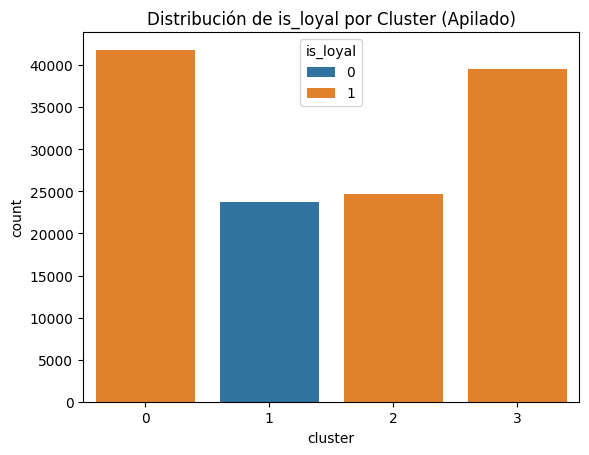


Tabla de contingencia para On-board service:
 On-board service  0     1     2      3      4      5
cluster                                             
0                 0  1525  1805   4574  17997  15932
1                 0  3183  3297   6414   6503   4383
2                 5  4821  7668   7229   3842   1149
3                 0  5258  5581  10325  10361   8028


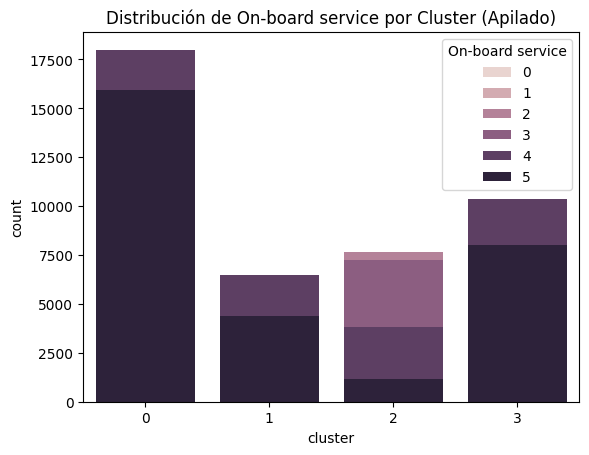


Tabla de contingencia para Leg room service:
 Leg room service    0     1     2     3      4      5
cluster                                              
0                   0   600  1189  3531  19047  17466
1                   0  2756  5130  5263   5373   5258
2                  91  4940  8826  6654   3042   1161
3                 507  4599  9395  9608   8424   7020


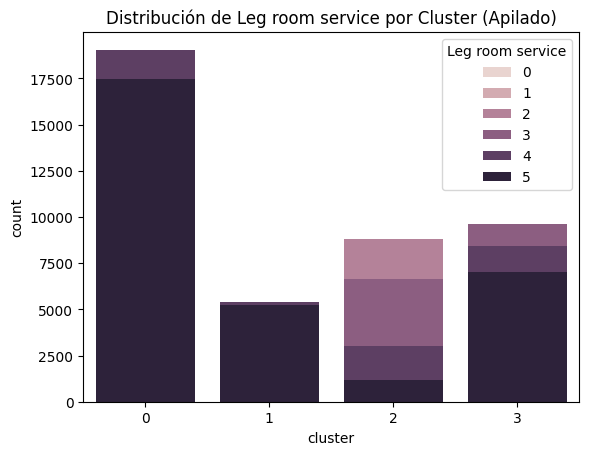


Tabla de contingencia para Online boarding:
 Online boarding     0     1     2      3      4      5
cluster                                               
0                  14   689  1587   3343  17717  18483
1                1050  3690  5866   6018   4737   2419
2                 355  3206  5332   7363   7370   1088
3                1661  5676  9149  10393   8644   4030


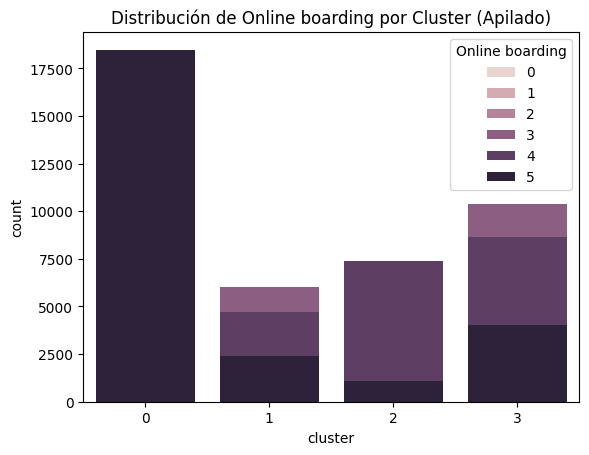

In [ ]:
categorical_variables = ['Business Travel','is_loyal', 'On-board service', 'Leg room service', 'Online boarding']

for categorical_variable in categorical_variables:
    contingency_table = pd.crosstab(df['cluster'], df[categorical_variable])
    print(f"\nTabla de contingencia para {categorical_variable}:\n", contingency_table)

    plt.figure()
    sns.countplot(x='cluster', hue=categorical_variable, data=df, dodge=False)
    plt.title(f'Distribución de {categorical_variable} por Cluster (Apilado)')
    plt.show()

# Dataset Final

## Conclusiones del Análisis de Clustering

**1. Número de Clusters y Tamaño:**

El análisis de clustering mediante el método de K-Means y el método del codo ha determinado que el número óptimo de clusters para este dataset es 4. El tamaño de cada cluster es el siguiente:

* Cluster 0: 39612 clientes
* Cluster 1: 26703 clientes
* Cluster 2: 39785 clientes
* Cluster 3: 23780 clientes


**2. Descripción de los Clusters:**

A continuación, se describe cada cluster en función de las características analizadas:

* **Cluster 0:**  
    > Este cluster está compuesto por viajeros que priorizan la comodidad y el entretenimiento durante el vuelo. Tienen una alta satisfacción general y valoran características como la comodidad del asiento, el entretenimiento a bordo y el servicio de wifi. Suelen viajar en clase Business o Eco Plus, y aunque pueden ser tanto viajeros de negocios como de placer, tienden a ser clientes leales. Este grupo representa un segmento de alto valor para la aerolínea y se podría considerar ofrecerles servicios premium y programas de fidelización específicos.

* **Cluster 1:**
    > Este cluster se caracteriza por viajeros que muestran un nivel de satisfacción más bajo. Experimentan retrasos con mayor frecuencia, tienen puntuaciones bajas en comodidad del asiento y entretenimiento a bordo. Suelen viajar en clase económica y podrían ser menos leales a la aerolínea. Es importante identificar las causas de su insatisfacción y tomar medidas para mejorar su experiencia, por ejemplo, ofreciendo opciones de entretenimiento más variadas o mejorando el proceso de embarque.


* **Cluster 2:**
    > Este cluster agrupa a viajeros que valoran la eficiencia y la facilidad de los procesos. Tienen una alta satisfacción con aspectos como la reserva online, el embarque online y la ubicación de la puerta de embarque. Pueden ser tanto viajeros de negocios como de placer, y suelen ser clientes leales. Se podría considerar ofrecerles beneficios relacionados con la agilidad en los procesos, como prioridad en el embarque o acceso a salas VIP.


* **Cluster 3:**
    > Este cluster representa a un grupo con características mixtas y un nivel de satisfacción moderado. Se caracterizan por un mayor número de vuelos al año y suelen viajar por motivos de negocios. Valoran el servicio a bordo y el espacio para las piernas. Podrían ser viajeros frecuentes que buscan una buena relación calidad-precio. Es importante comprender mejor sus necesidades y preferencias específicas para ofrecerles servicios personalizados que aumenten su satisfacción.


**3. Posible Utilidad:**

Los resultados del análisis de clustering pueden ser utilizados por la aerolínea para:

* **Segmentación de clientes:** Identificar grupos de clientes con necesidades y preferencias similares para ofrecerles servicios y productos más personalizados.
* **Estrategias de marketing:** Diseñar campañas de marketing más efectivas dirigidas a cada cluster, destacando los atributos que valoran más.
* **Mejora del servicio:** Identificar áreas de mejora en el servicio al cliente en función de las características que generan insatisfacción en cada cluster.
* **Fidelización de clientes:** Implementar programas de fidelización específicos para cada cluster, ofreciendo beneficios que se ajusten a sus necesidades.

# Exportar el dataset final para crear un nuevo notebook para el modelado

In [ ]:
df.to_csv('aerolinea_final.csv', index=False)

files.download('aerolinea_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>